# **General Information**
As we all know, the Philippines is one of the most interesting country in the world. By being colonized by the Spaniards for over 300 years, by the americans for almost 50 years, and the Japanese during World War II, to suffering from the dictatorship of its former president, Ferdinand Marcos. In this notebook, will analyze how Filipinos spend, earn, and discuss the demographics and social classes of The Philippines.

# **Objectives**
1. Clean the dataset and remove outliers that may alter our findings.
2. Describe and analyze which industry is focused on by each region.
3. Compare the spending and earning capabilities of each region.
4. Identify the inner workings of a family and find out if this correlates to earning more.

# **Importing Libraries and Assigning the Data**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/family-income-and-expenditure/Family Income and Expenditure.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline

df = pd.read_csv('/kaggle/input/family-income-and-expenditure/Family Income and Expenditure.csv')
pd.set_option('display.max_columns',60)

# **Cleaning the Dataset**

In [3]:
df.shape
print(f'The DataFrame that was used has {df.shape[0]} rows, and {df.shape[1]} columns.')

The DataFrame that was used has 41544 rows, and 60 columns.


In [4]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,2.092154e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,1.381686e+04,5.437624e+04,51.381451,4.635182,0.410216,1.362579,1.272699,55.603360,20.125505,1.788008,0.890815,0.856875,0.435225,0.162141,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,3.937152e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,4.764378e+04,1.471428e+05,14.166081,2.280252,0.694390,1.408000,1.149152,55.023165,14.295452,1.105664,0.311875,0.646306,0.560125,0.389108,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,6.000000e+03,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000,0.000000,25.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.080000e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1

In [5]:
df.head(3)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df['Region'].value_counts()

IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64

Region names are too long, let's use the roman numerals for it to be easier to read.

In [7]:
df['Region_num'] = [x.split()[0] for x in df['Region']]
df['Region_num'].value_counts()

IVA       4162
NCR       4130
III       3237
VI        2851
VII       2541
V         2472
XI        2446
I         2348
VIII      2337
ARMM      2248
II        2219
XII       2122
X         1887
IX        1788
Caraga    1782
CAR       1725
IVB       1249
Name: Region_num, dtype: int64

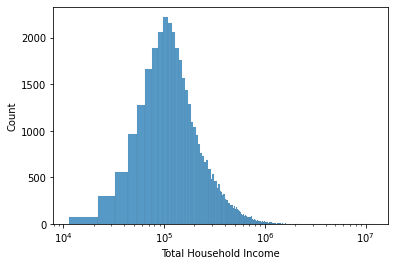

In [8]:
sns.histplot(df['Total Household Income'])
ax = plt.gca()
ax.set_xscale('log')

Relationship between total household income and total food expenditure.

Text(0.5, 0, 'Household Income')

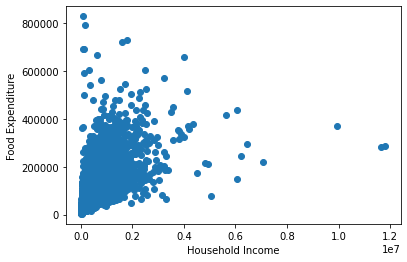

In [9]:
var = 'Total Food Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Food Expenditure')
plt.xlabel('Household Income')

Relationship between total household income and Housing and water Expenditure.

Text(0.5, 0, 'Household Income')

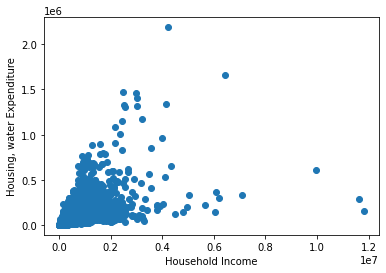

In [10]:
var = 'Housing and water Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Housing, water Expenditure')
plt.xlabel('Household Income')

Relationship between total household income and Medical Care Expenditure.

Text(0.5, 0, 'Household Income')

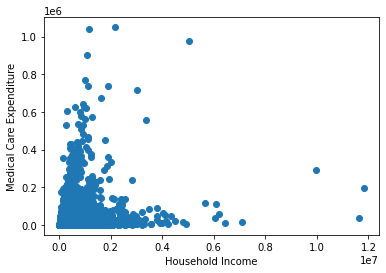

In [11]:
var = 'Medical Care Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Medical Care Expenditure')
plt.xlabel('Household Income')

Relationship between total household income and Education Expenditure.

Text(0.5, 0, 'Household Income')

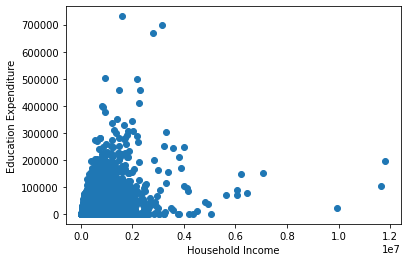

In [12]:
var = 'Education Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Education Expenditure')
plt.xlabel('Household Income')

Relationship between total household income and Total Income from Entrepreneurial Acitivites.

Text(0.5, 0, 'Household Income')

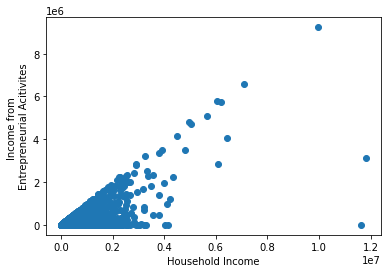

In [13]:
var = 'Total Income from Entrepreneurial Acitivites'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Income from \nEntrepreneurial Acitivites')
plt.xlabel('Household Income')

We could notice that there are plenty of outliers, thanks to these graphs, we could find out which of the datapoints we should remove

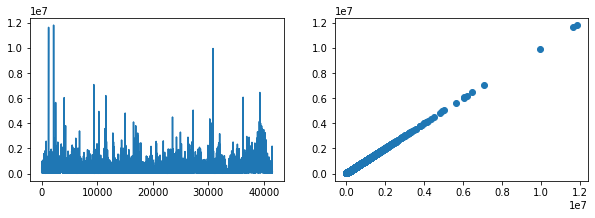

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
plt.gcf().set_size_inches(10,3)
ax1.plot(df['Total Household Income'])
ax2.scatter(df['Total Household Income'],df['Total Household Income'])
# we can see that there are an outlier, we could also notice it from the different plots above.
# those outliers are those earning more than 5 million pesos a year

We should first sort the databy household income to remove outliers.
By doing this, we could remove 10 data points which would be worth removing because there are 41525 other data points and removing 10 wouldn't disrupt the data that much.

In [15]:
max_income = df.sort_values('Total Household Income',ascending = False)
df = df.drop([2139,1238,30865,9382,39302,11546,36286,4046,2505,2505])
df.sort_index(inplace = True)

We should check if the data is clean, and if there are still outliers.

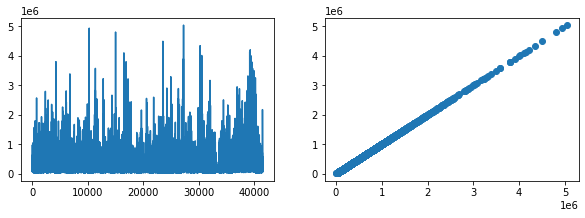

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
plt.gcf().set_size_inches(10,3)
ax1.plot(df['Total Household Income'])
ax2.scatter(df['Total Household Income'],df['Total Household Income'])

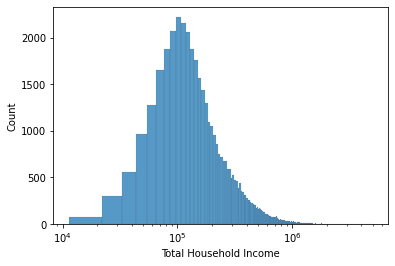

In [17]:
sns.histplot(df['Total Household Income'])
ax = plt.gca()
ax.set_xscale('log')

Text(0.5, 0, 'Household Income')

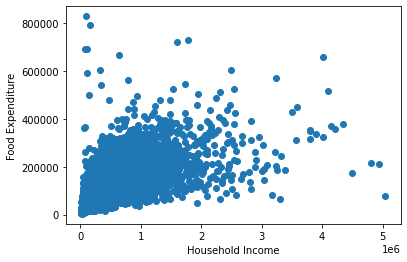

In [18]:
var = 'Total Food Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Food Expenditure')
plt.xlabel('Household Income')

Text(0.5, 0, 'Household Income')

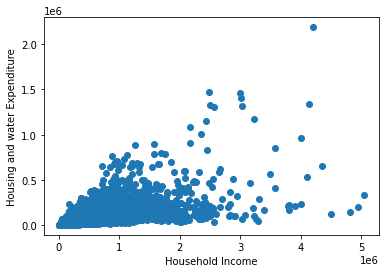

In [19]:
var = 'Housing and water Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Housing and water Expenditure')
plt.xlabel('Household Income')

Text(0.5, 0, 'Household Income')

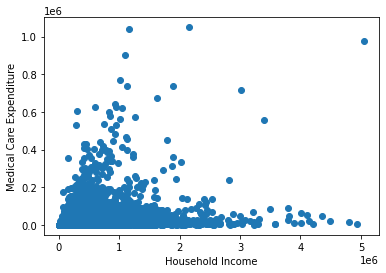

In [20]:
var = 'Medical Care Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Medical Care Expenditure')
plt.xlabel('Household Income')

Text(0.5, 0, 'Household Income')

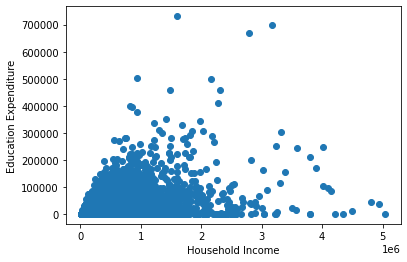

In [21]:
var = 'Education Expenditure'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Education Expenditure')
plt.xlabel('Household Income')

Text(0.5, 0, 'Household Income')

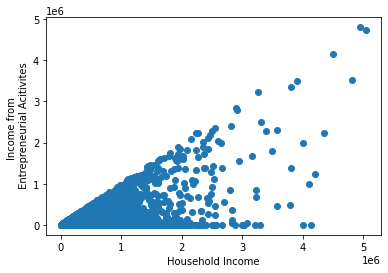

In [22]:
var = 'Total Income from Entrepreneurial Acitivites'
plt.scatter(df['Total Household Income'],df[var])
plt.ylabel('Income from \n Entrepreneurial Acitivites')
plt.xlabel('Household Income')

Based on the graphs above, there are no more outliers. We could then proceed to analyzing the data.

# **Data Exploration and Vizualization**

Let us first find out which regions are the richest, and which regions are the poorest.

In [23]:
region_grp = df.groupby('Region_num')
reg_income = region_grp['Total Household Income'].mean()
reg_income_df = pd.DataFrame(reg_income)

Text(0.5, 1.0, 'Annual Household Income per Region')

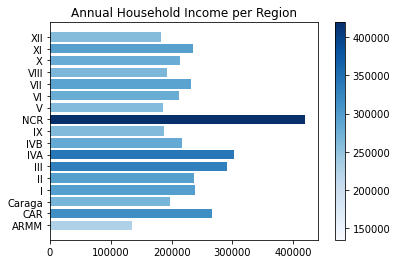

In [24]:
reg_income_df.sort_index(ascending = False)
plt.clf()
plt.colorbar(plt.scatter (reg_income, reg_income, c = reg_income, cmap = 'Blues'))
colors = cm.Blues(reg_income / float (max (reg_income)))
plt.barh(reg_income_df.index, reg_income, color = colors)
plt.title('Annual Household Income per Region', color = 'black')

Based on the graph above, NCR, Region IVA, and III, are considered as the richest region in the country with NCR leading the pact with an average of over 420,000 pesos annual income. ARMM, region V, IX, VIII, XII are considered as the poorest region in the country. ARMM, the Autonomous Region of Muslim Mindanao is the poorest region in the country due to the lack of funding from the national government and corrupt politicians.

Let us then findout which regions are agricultural and which regions that are non-agricultural.

In [25]:
reg_grp = df.groupby(['Agricultural Household indicator'])
agr = pd.DataFrame(reg_grp['Region_num'].value_counts())
me = df['Total Household Income']
agr0 = agr.loc[0].sort_index()
agr1 = agr.loc[1].sort_index()
agr2 = agr.loc[2].sort_index()

Text(0.5, 1.0, 'Non-Agricultural Regions')

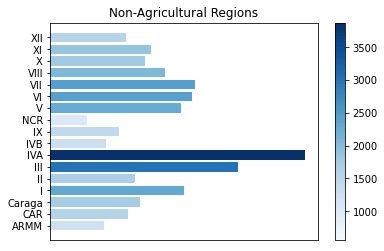

In [26]:
colors = cm.Blues(agr0['Region_num']/float(max(agr0['Region_num'])))
plt.clf()
plt.colorbar(plt.scatter(agr0['Region_num'],agr0['Region_num'], c = agr0['Region_num'], cmap = 'Blues'))
plt.barh(agr0['Region_num'].index,agr0['Region_num'], color = colors)
plt.xticks([])
plt.title('Non-Agricultural Regions')

Region IVA has the most number of non-agricultural households and the region that contains the least amount of household that belongs to the non-agricultural sector is ARMM. Surprisingly, NCR also has a low number of non-agricultural household considering that it is the richest region in the country.

Text(0.5, 1.0, 'Agricultural Regions')

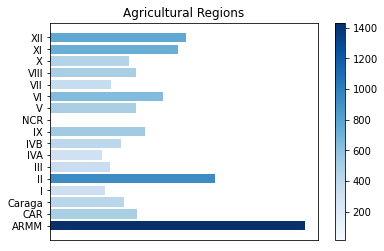

In [27]:
colors = cm.Blues(agr1['Region_num']/float(max(agr1['Region_num'])))
plt.clf()
plt.colorbar(plt.scatter(agr1['Region_num'],agr1['Region_num'], c = agr1['Region_num'], cmap = 'Blues'))
plt.barh(agr1['Region_num'].index,agr1['Region_num'], color = colors)
plt.xticks([])
plt.title('Agricultural Regions')

ARMM has the most number of agricultural household in the country, and NCR which has almost zero household that belongs to the agricultural sector.

Text(0.5, 1.0, 'Both Agricultural and Non-Regions')

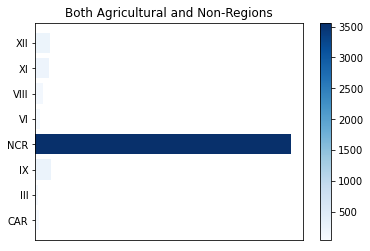

In [28]:
colors = cm.Blues(agr2['Region_num']/float(max(agr2['Region_num'])))
plt.clf()
plt.colorbar(plt.scatter(agr2['Region_num'],agr2['Region_num'], c = agr2['Region_num'], cmap = 'Blues'))
plt.barh(agr2['Region_num'].index,agr2['Region_num'], color = colors)
plt.xticks([])
plt.title('Both Agricultural and Non-Regions')

The graph above only has data for 8 regions wherein NCR is mainly considered as a mix of agricultural and non-agricultural.

# **Family Expenditure**

Let us find out if there are any correlations between the spending habits of those that belong to each sector of agriculture.

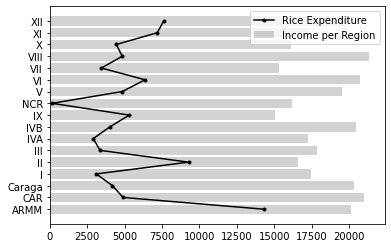

In [29]:
rice_region = region_grp['Total Rice Expenditure'].mean()
fig, ax2 = plt.subplots()

ax2.plot(agr1['Region_num']*10,agr0.index, color = 'k', marker = '.',label = 'Rice Expenditure')
ax2.barh(rice_region.index,rice_region,alpha = 0.35,label = 'Income per Region', color ='gray')
plt.legend()

In the graph above, we compared the rice expenditure in terms of the average income per region. It is shown that agricultural regions pay way more rice than those that belong to the non-agricultural regions. This may be due to the fact that the rice produced by these agricultural regions are sent to the higher income regions, such as region IVA, III, and NCR.

Text(0.5, 1.0, 'Total Food Expenditure')

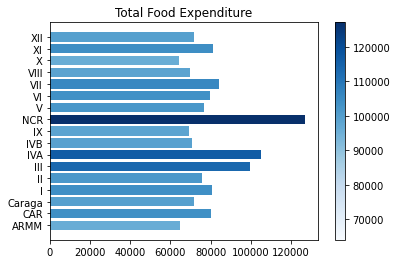

In [30]:
food_mean = region_grp['Total Food Expenditure'].mean()
colors = cm.Blues(food_mean/float(max(food_mean)))
plt.clf()
plt.colorbar(plt.scatter(food_mean,food_mean, c = food_mean, cmap = 'Blues'))
plt.barh(food_mean.index,food_mean, color = colors)
plt.title('Total Food Expenditure')

When it comes to total food expenditure, high income regions tend to spend more money on food than those that belong to the low income regions. NCR, region IVA, and III spend the most on food.

Region_num
ARMM      48.187610
CAR       30.170883
Caraga    36.521059
I         33.870862
II        31.930453
III       34.200521
IVA       34.722364
IVB       32.655815
IX        36.993641
NCR       30.290826
V         41.273050
VI        37.516352
VII       36.282990
VIII      36.199802
X         29.951065
XI        34.394619
XII       39.204397
dtype: float64

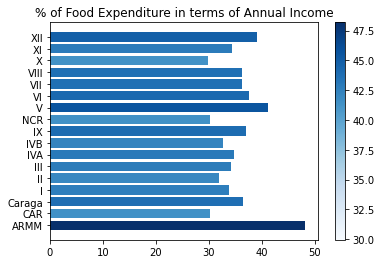

In [31]:
income_food_mean = (food_mean / reg_income) *100
income_food_mean.sort_index(ascending = False)
colors = cm.Blues(income_food_mean/float(max(income_food_mean)))
plt.clf()
plt.colorbar(plt.scatter(income_food_mean,income_food_mean, c = income_food_mean, cmap = 'Blues'))
plt.barh(income_food_mean.index,income_food_mean, color = colors)
plt.title('% of Food Expenditure in terms of Annual Income')
income_food_mean

On the previous graph, it is shown that higher income region spends more money on food than those that belong the low income region, but based on the graph above, the percentage of food expenditure in terms of the average annual income of these regions says that poorer region may spend lower than those of richer region, but because of the low earning capabilities of regions such as ARMM, this drives how much money they spend on money. In ARMM, 48% of the total household income of each family goes to food while 30% of the total household income was spend on food by those that belong in NCR. 

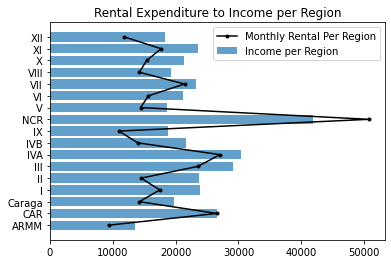

In [32]:
mean_rental_house = region_grp['Imputed House Rental Value'].mean()
fig, ax1 = plt.subplots()

ax1.plot(mean_rental_house,reg_income.index,color = 'k',marker = '.', label = 'Monthly Rental Per Region')
ax1.barh(reg_income.index,reg_income/10,label = 'Income per Region',alpha = 0.7)
plt.title('Rental Expenditure to Income per Region')
plt.legend()

In terms of rental expenditure, we could say that rental cost is relative to the income of all the regions in the Philippines, with NCR having a slight disadvantage of spending more compared to other regions.

<BarContainer object of 17 artists>

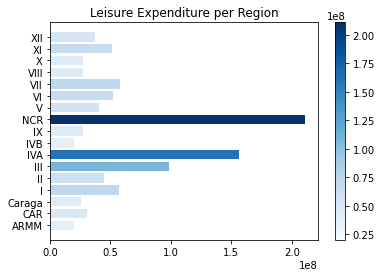

In [33]:
leisure_exp = region_grp['Restaurant and hotels Expenditure'].sum()+region_grp['Alcoholic Beverages Expenditure'].sum()+ region_grp['Tobacco Expenditure'].sum()+region_grp['Clothing, Footwear and Other Wear Expenditure'].sum()
colors = cm.Blues(leisure_exp/float(max(leisure_exp)))
plt.clf()
plt.colorbar(plt.scatter(leisure_exp,leisure_exp, c = leisure_exp, cmap = 'Blues'))
plt.title('Leisure Expenditure per Region')
plt.barh(leisure_exp.index,leisure_exp, color = colors)

Let us now compare the leisure expenses of each region in the Philippines. Leisure expenses includes restaurants expenses, hotel expenses, alcohol expenses, tobacco expenses, and clothing expenses. It is shown that there is a huge difference between the top 3 richest region and lower income region. It shows that richer families spend a lot more on leisure expenses than those that belong to lower income region.

# **National Capital Region**
The National Capital Region houses different socio-economic status ranging from the poorest to the richest. Let us compare the spending behavior of these social classes and understand how each of these classes spend their earnings.

In [34]:
ncr_filt = region_grp.get_group('NCR')
ncr_df = pd.DataFrame(ncr_filt)
ncr_df['Above_below'] = ncr_filt['Total Household Income'] >  ncr_filt['Total Household Income'].mean()
rich = ncr_df.loc[ncr_df['Above_below'] == True]
poor = ncr_df.loc[ncr_df['Above_below'] == False]

The annual median salary in NCR is 312,200 pesos and out of the 4129 households who answered the survey, 1378 were considered rich while 2751 were considered poor.

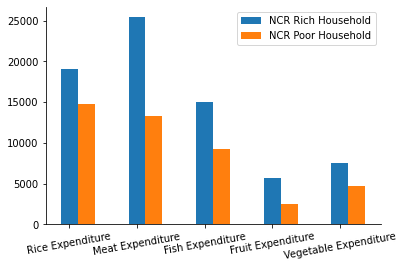

In [35]:
x = [rich['Total Rice Expenditure'].mean(),rich['Meat Expenditure'].mean(), 
     rich['Total Fish and  marine products Expenditure'].mean(),rich['Fruit Expenditure'].mean(),
    rich['Vegetables Expenditure'].mean()]
y = [poor['Total Rice Expenditure'].mean(),poor['Meat Expenditure'].mean(),  
     poor['Total Fish and  marine products Expenditure'].mean(),poor['Fruit Expenditure'].mean(),
    poor['Vegetables Expenditure'].mean()]

ti = ['Rice Expenditure','Meat Expenditure', 'Fish Expenditure',
     'Fruit Expenditure','Vegetable Expenditure']
hor = np.arange(len(ti))

fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.bar(ti,x, width = 0.25, label = 'NCR Rich Household')
ax.bar(hor+ 0.25,y, width = 0.25, label = 'NCR Poor Household')
plt.xticks(rotation = 10)
plt.legend()

First off, we compared the food expenditure of the rich and poor households in NCR. We can see that the rich household spends a lot more on all categories especially on meat and fish expenditures as compared to its counter-parts. We could also notice that the poor household spends the most on rice which is a must in a filipino household.

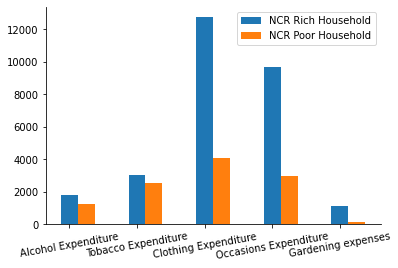

In [36]:
x = [rich['Alcoholic Beverages Expenditure'].mean(),
    rich['Tobacco Expenditure'].mean(),rich['Clothing, Footwear and Other Wear Expenditure'].mean(),
    rich['Special Occasions Expenditure'].mean(),rich['Crop Farming and Gardening expenses'].mean()]
y = [poor['Alcoholic Beverages Expenditure'].mean(),
    poor['Tobacco Expenditure'].mean(),poor['Clothing, Footwear and Other Wear Expenditure'].mean(),
    poor['Special Occasions Expenditure'].mean(),poor['Crop Farming and Gardening expenses'].mean()]

fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ti = ['Alcohol Expenditure','Tobacco Expenditure','Clothing Expenditure',
'Occasions Expenditure','Gardening expenses']
hor = np.arange(len(ti))

ax.bar(ti,x, width = 0.25, label = 'NCR Rich Household')
ax.bar(hor + 0.25, y, width = 0.25, label = 'NCR Poor Household')
plt.xticks(rotation = 10)
plt.legend()

In the graph above, we could notice a huge discrepancy between the two social classes. It is evident that the Rich household spends more on clothing and occasions expenditure. It is worth noting that the rich and the poor household only has 10,000 pesos difference in spending in terms of purchasing alcohol and tobacco products.

# **Educational Attainment**
Let us figure out if educational attainment plays a role on classifying where a household will be in terms of its socio-economic status.

<AxesSubplot:title={'center':'20 Highest Earning Educational Attainment'}, ylabel='Educational Attainment'>

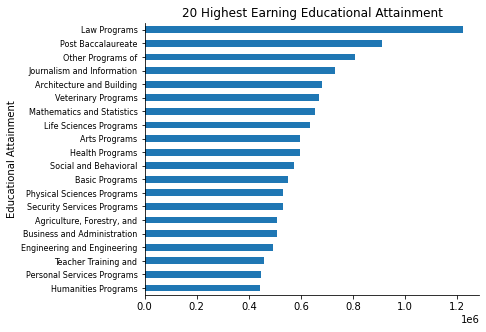

In [37]:
income_grp = df.groupby('Household Head Occupation')
occupation = income_grp['Total Household Income'].mean()

fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
df['Educational Attainment'] = [' '.join(x.split()[0:3]) for x in df['Household Head Highest Grade Completed']]
grade_grp = df.groupby('Educational Attainment')
gradeup = grade_grp['Total Household Income'].mean().sort_values(ascending = True)[25:]
gradedown = grade_grp['Total Household Income'].mean().sort_values()[:21]
plt.title('20 Highest Earning Educational Attainment')
plt.yticks(fontsize = 8)
grays = ['gray' for x in range(21)]
gradeup.plot(kind = 'barh',figsize = (6,5))

Based on the graph above, taking Law and Phd would yield the best earnings in the Philippines. 

Let us now find out which educational attainment earns the lowest in the Philippines.

<AxesSubplot:title={'center':'20 Lowest Earning Educational Attainment'}, ylabel='Educational Attainment'>

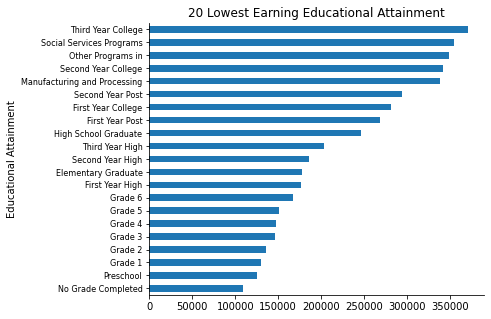

In [38]:
fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize = 8)
plt.title('20 Lowest Earning Educational Attainment')
gradedown.plot(kind = 'barh',figsize = (6,5))

Having zero education in the Philippines would put a household in the lowest tier in terms of the social classes in the country. Having passed the second year of College, this would allow the household to have a higher salary than the median salary of the whole country, and attaining just the first year of college and below would put a family under the annual average income of the country.

This shows the importance of having an education because this could allow a family to live a comfortable life and having the financial freedom that everyone deserves to have.

# **Unemployment Rate**

<AxesSubplot:title={'center':'Unemployment Rate per Region (%)'}>

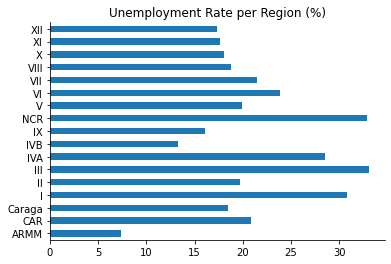

In [39]:
fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
df['Household Head Job or Business Indicator'].value_counts()
employed_grp = df.groupby('Household Head Job or Business Indicator')
jobless = employed_grp.get_group('No Job/Business')
with_job = employed_grp.get_group('With Job/Business')
rate = (jobless['Region_num'].value_counts()/with_job['Region_num'].value_counts())*100
plt.title('Unemployment Rate per Region (%)')
rate.plot(kind = 'barh')

The National Capital Region and Region III has the most number of unemployed individuals in terms of percentage. It is then followed by Region I and Region IVA. We could notice that richer regions seems to have a worse case of unemployment than poorer regions. This could be caused by lack of skills, congestion, or the lack of infrastructures to cater that much people.

# **Conclusion and Findings**
1. Poorer regions tend to focus on the agricultural sector while rich regions has a tendency to focus on other regions such as BPO, IT and Industrial sector.
2. Agricultural regions earns significantly lower than those regions who focused on other sectors. The rich and the poor regions has a correlation in food expenditure while there is a huge discrepancy between the rich and the poor in terms of leisure expenditure with the exception of alcohol and tobacco consumption.
3. Educational Attainment plays a huge role in the ability of a household to earn more than those without having attained at least a two year degree.